### a)Grover's Algorithm with a Boolean Oracle
This code is adapted from code on qiskit.org found <a href = https://qiskit.org/textbook/ch-algorithms/grover.html>here</a>.

In [164]:
# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit

# import basic plot tools
from qiskit.visualization import plot_histogram

In [165]:
#new boolean oracle
qc = QuantumCircuit(4)
qc.x(0)
qc.x(2)
qc.mcx([0,1,2], 3)
qc.x(0)
qc.x(2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U_w"

In [166]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [167]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits-1):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)  # multi-controlled-toffoli
    qc.h(nqubits-2)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits-1):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits-1):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U_s"
    return U_s

In [168]:
n = 4
grover_circuit = QuantumCircuit(n, 3)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2,3])
grover_circuit.append(diffuser(n), [0,1,2,3])
grover_circuit.measure([0,1,2], [0,1,2])
grover_circuit.draw()

┌───┐┌──────┐┌──────┐┌─┐      
q_0: ┤ H ├┤0     ├┤0     ├┤M├──────
     ├───┤│      ││      │└╥┘┌─┐   
q_1: ┤ H ├┤1     ├┤1     ├─╫─┤M├───
     ├───┤│  U_w ││  U_s │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2     ├┤2     ├─╫──╫─┤M├
     └───┘│      ││      │ ║  ║ └╥┘
q_3: ─────┤3     ├┤3     ├─╫──╫──╫─
          └──────┘└──────┘ ║  ║  ║ 
c: 3/══════════════════════╩══╩══╩═
                           0  1  2

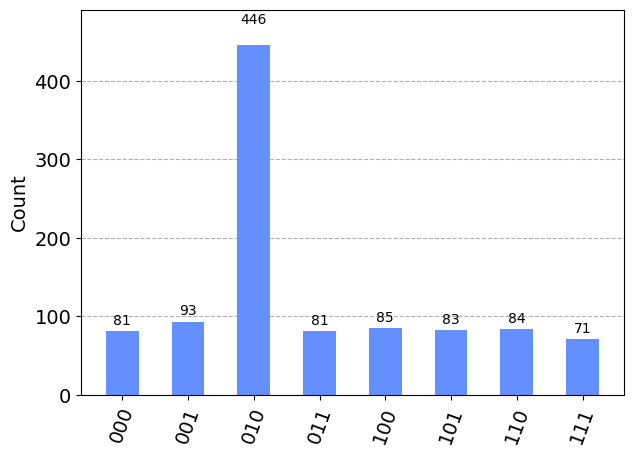

In [169]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

### b) Difference Between a Phase Oracle and a Boolean oracle
The phase oracle uses the phase of a state to mark the desired element, whereas the boolean oracle uses a fourth qubit to mark the desired element.